<h1>GRADIENT BOOSTING</h1>

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib as plotclf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sbs
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
#loading dataset and splitting into train and test data. 
iris_dataset= datasets.load_iris()
X_data,y_target=iris_dataset.data,iris_dataset.target
mean_accuracy=[]
X_train_data, X_test_data, y_train_target, y_test_target = train_test_split(X_data, y_target, train_size=0.8, random_state=42)


In [3]:
#Fitting the classifier and using cross val score to perform multiple splits.
number_of_estimators=[5,10,50,150,200]
for i in number_of_estimators:
    scores=[]
    gb_clfier_1 = GradientBoostingClassifier(n_estimators=i,random_state=42)  
    scores=cross_val_score(gb_clfier_1, X_train_data, y_train_target, cv=10)
# dividing the training data of 80% into ratio of 90:10 for multiple splits using one fold for testing at a time.
    print("Mean Accuracy:  ", scores.mean(),"at number of estimators= ",i)
    mean_accuracy.append(scores.mean())

Mean Accuracy:   0.9333333333333332 at number of estimators=  5
Mean Accuracy:   0.9333333333333332 at number of estimators=  10
Mean Accuracy:   0.9249999999999998 at number of estimators=  50
Mean Accuracy:   0.9249999999999998 at number of estimators=  150
Mean Accuracy:   0.9249999999999998 at number of estimators=  200


<h3>Here, we have computed Mean accuracies at different number of estimators.</h3>

In [4]:
#finding the best value for number of estimators for maxmum accuracy at validation set 
best_accuracy=max(mean_accuracy)
best_no_of_estimators_with_highest_accuracy=[]
itrtr=0
for k in mean_accuracy:
    if k==best_accuracy:
        best_no_of_estimators_with_highest_accuracy.append(number_of_estimators[itrtr])
    itrtr+=1
print("Best values for no of estimators with highest accuracy at: accuracy=",best_accuracy,"is/are",best_no_of_estimators_with_highest_accuracy)


Best values for no of estimators with highest accuracy at: accuracy= 0.9333333333333332 is/are [5, 10]


<h3>Best Accuracy for validation set is found at [5,10] which is 93.33%</h3>



 Mean accuracy and no of estimators :

    No of Estimators  Mean accuracy
0                 5       0.933333
1                10       0.933333
2                50       0.925000
3               150       0.925000
4               200       0.925000


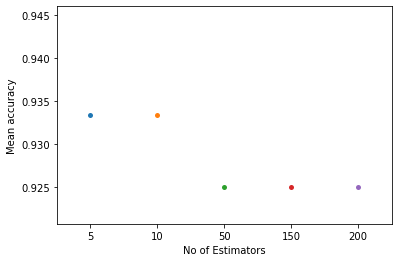

In [5]:
#converting number of estimator list and mean accuracy list into dataframe for plotting in swarmplot.
estimators_df=pd.DataFrame(number_of_estimators)
mean_accuracy_df=pd.DataFrame(mean_accuracy)
join = pd.concat([estimators_df, mean_accuracy_df], axis=1)
join.columns=[ 'No of Estimators','Mean accuracy']
print('\n\n Mean accuracy and no of estimators :\n\n', join)

sbs.swarmplot(x='No of Estimators',y='Mean accuracy', data=join)


<h2>OBSERVATIONS AND ANALYSIS</h2>
<h3>1.There is no overfitting and number of estimators=5 is enough to clear the errors made by the predecessor models.</h3>
<h3>2.Number of estimators= [5] are good to learn the patterns about the data for our model and leaving no chance to increase the time complexity to a higher level. </h3>
<h3>3. If we choose n_estimators=10, it will gradually increase the time complexity for training the model.</h3>
<h3> NOTE: IF WE CHOOSE n_estimators=10, IT WILL NOT CAUSE OVERFITTING BECAUSE GTB DOESN'T RESULT IN MUCH OVERFITTING. S0, IT WILL IMPROVE THE PERFORMANCE AND ACCURACY WITH AN INCREASE IN TIME COMPLEXITY AS WELL.</h3>